## Principal component analysis (PCA)

### Use the iris data to explain

In [2]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
iris.pca <- prcomp(iris[,1:4],
                 center = TRUE,
                 scale. = TRUE) 
print(iris.pca)
summary(iris.pca)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

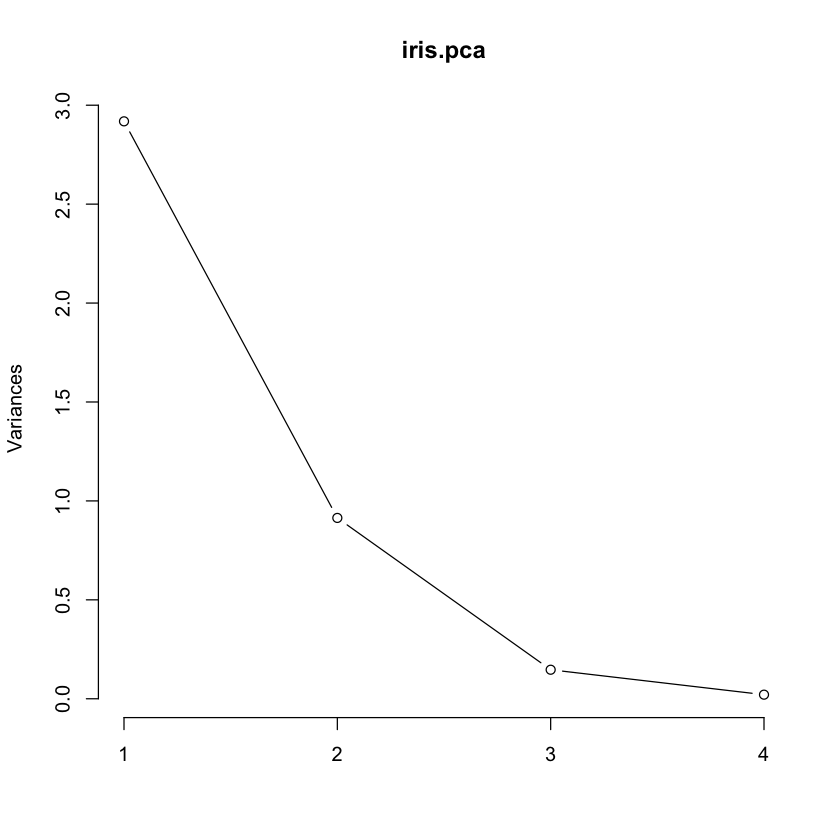

In [6]:
# plot method
plot(iris.pca, type = "l")

### Use stock market time series to show PCA

In [8]:
library(quantmod)
tckrs <- c("SPY", "QQQ", "AMZN", "GOOG", "WMT","LMT")
getSymbols(tckrs, from = "2015-01-01")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols


[1] "SPY"  "QQQ"  "AMZN" "GOOG" "WMT"  "LMT"

In [10]:
SPY.Close <- SPY[,4]
QQQ.Close <- QQQ[,4]
AMZN.Close <- AMZN[,4]
GOOG.Close <- GOOG[,4]
WMT.Close <- WMT[,4]
LMT.Close <- LMT[,4]

Calculate the cumulative returns. It is like investing $1 in Day 1.
You simply divide the daily price in the series by the price of the first day

In [20]:
SPY1 <- as.numeric(SPY.Close[1])
QQQ1 <- as.numeric(QQQ.Close[1])
AMZN1 <- as.numeric(AMZN.Close[1])
WMT1 <- as.numeric(WMT.Close[1])
LMT1 <- as.numeric(LMT.Close[1])

SPY <- SPY.Close/SPY1
QQQ <- QQQ.Close/QQQ1
AMZN <- AMZN.Close/AMZN1
WMT <- WMT.Close/WMT1
LMT <- LMT.Close/LMT1

In [21]:
all <- cbind(SPY, QQQ, AMZN, WMT,LMT)
head(all)

           SPY.Close QQQ.Close AMZN.Close WMT.Close LMT.Close
2015-01-02 1.0000000 1.0000000  1.0000000 1.0000000 1.0000000
2015-01-05 0.9819404 0.9853312  0.9794827 0.9970896 0.9792044
2015-01-06 0.9726915 0.9721197  0.9571179 1.0047729 0.9746004
2015-01-07 0.9848124 0.9846512  0.9672631 1.0314319 0.9871709
2015-01-08 1.0022879 1.0034972  0.9738753 1.0532014 1.0094150
2015-01-09 0.9942560 0.9968914  0.9624336 1.0401629 1.0088459

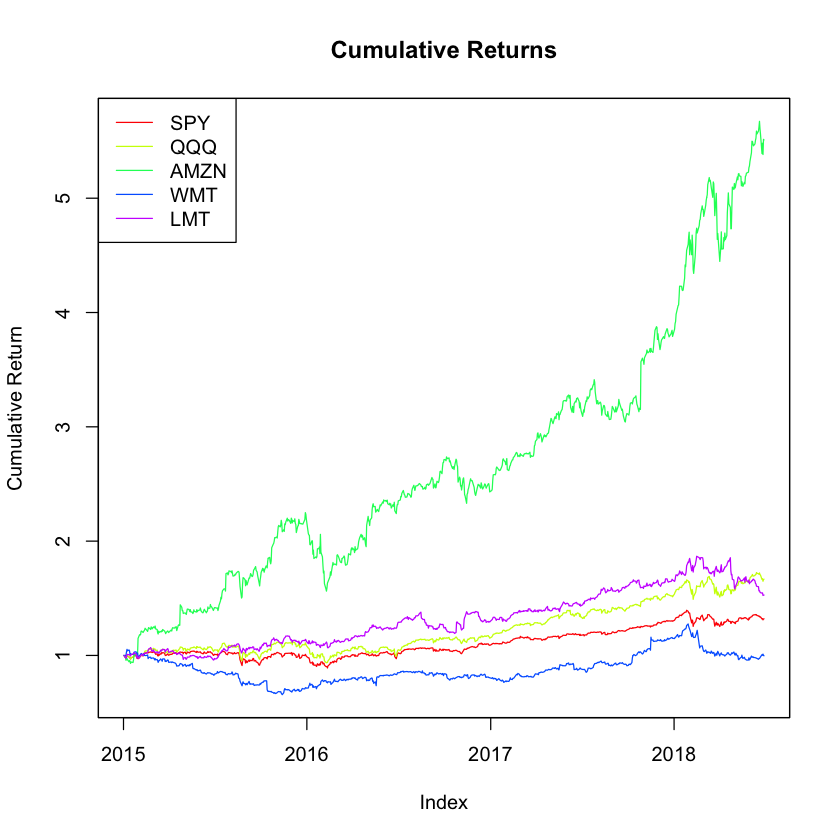

In [22]:
# The xts package is an extension of the zoo package, so coercing our xts object basket to a zoo object is a simple task:

all.z <- as.zoo(all)

# Set a color scheme:
ts <- rainbow(ncol(all.z))
# Plot the overlayed series
plot(x = all.z, ylab = "Cumulative Return", main = "Cumulative Returns",
        col = ts, screens = 1)
# Set a legend in the upper left hand corner to match color to return series
legend(x = "topleft", legend = c("SPY", "QQQ", "AMZN", "WMT","LMT"), 
       lty = 1,col = ts)

In [23]:
all.pca <- prcomp(all.z,
                 center = TRUE,
                 scale. = TRUE) 
print(all.pca)
summary(all.pca)

Standard deviations (1, .., p=5):
[1] 2.08587777 0.71877052 0.27386348 0.22710516 0.07684325

Rotation (n x k) = (5 x 5):
                 PC1          PC2         PC3         PC4         PC5
SPY.Close  0.4738862  0.001496713 -0.22658651  0.56929462  0.63244905
QQQ.Close  0.4732761 -0.117984660 -0.38986677  0.26674441 -0.73412578
AMZN.Close 0.4530108 -0.379198272 -0.25944987 -0.72993251  0.22555298
WMT.Close  0.3669012  0.891539692  0.04676874 -0.26013758 -0.02610758
LMT.Close  0.4600068 -0.217814205  0.85273730  0.06540663 -0.09752841


Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     2.0859 0.7188 0.2739 0.22711 0.07684
Proportion of Variance 0.8702 0.1033 0.0150 0.01032 0.00118
Cumulative Proportion  0.8702 0.9735 0.9885 0.99882 1.00000